In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
train_df=pd.read_csv('news_articles.csv')
train_df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [48]:
train_df.shape

(2096, 12)

In [49]:
train_df['label'].replace('Real',1, inplace=True)
train_df['label'].replace('Fake',0, inplace=True)
#train_df.fillna(' ', inplace=True)
train_df.dropna(inplace=True)

C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_23896\3644739189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['label'].replace('Real',1, inplace=True)
C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_23896\3644739189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [50]:
#filling nan values with space(' ')
#train_df.fillna(' ',inplace=True)
#combining title and author,title and summary is formed
train_df['summary'] = train_df['title']+' '+train_df['author']+' '+train_df['text_without_stopwords']+train_df['language']+train_df['main_img_url']

In [51]:
train_df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,summary
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,muslims busted they stole millions in govt ben...
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,re why did attorney general loretta lynch plea...
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,breaking weiner cooperating with fbi on hillar...
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1.0,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,pin drop speech by father of daughter kidnappe...
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1.0,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,fantastic trumps point plan to reform healthc...


In [52]:
for i in train_df.columns:
    print(train_df[i].dtypes)

object
object
object
object
object
object
object
object
float64
object
object
float64
object


In [53]:
train_df['label'].unique()
train_df = train_df[train_df['label'] != ' ']

In [54]:
x=train_df['summary']
y=train_df['label']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [55]:
print(train_df['summary'].dtypes)

object


In [56]:
#Chargement de deux composants du modèle BERT (Bidirectional Encoder Representations from Transformers)
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [57]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [58]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [59]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [60]:
len(X_train)

1636

In [61]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS,
            )

In [62]:
model_final = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 301s 5s/step - loss: 0.6933 - accuracy: 0.6051 - precision: 0.4009 - recall: 0.1443
Epoch 2/10
52/52 [==============================] - 243s 5s/step - loss: 0.6642 - accuracy: 0.6198 - precision: 0.4112 - recall: 0.0730
Epoch 3/10
52/52 [==============================] - 435s 8s/step - loss: 0.6502 - accuracy: 0.6235 - precision: 0.3934 - recall: 0.0398
Epoch 4/10
52/52 [==============================] - 410s 8s/step - loss: 0.6446 - accuracy: 0.6443 - precision: 0.5882 - recall: 0.1161
Epoch 5/10
52/52 [==============================] - 352s 7s/step - loss: 0.6603 - accuracy: 0.6180 - precision: 0.4433 - recall: 0.1426
Epoch 6/10
52/52 [==============================] - 513s 10s/step - loss: 0.6333 - accuracy: 0.6504 - precision: 0.5787 - recall: 0.1891
Epoch 7/10
52/52 [==============================] - 387s 7s/step - loss: 0.6294 - accuracy: 0.6418 - precision: 0.5528 - recall: 0.1476
Epoch 8/10
52/52 [=============================

In [63]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 116s 9s/step - loss: 0.6226 - accuracy: 0.6333 - precision: 1.0000 - recall: 0.0066


[0.622616171836853, 0.6332518458366394, 1.0, 0.0066225165501236916]

In [64]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predicted)

13/13 [==============================] - 114s 9s/step


Text(50.722222222222214, 0.5, 'Truth')

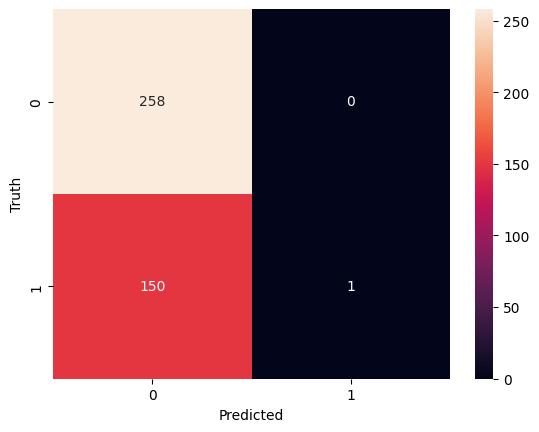

In [65]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 

In [66]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       258
           1       1.00      0.01      0.01       151

    accuracy                           0.63       409
   macro avg       0.82      0.50      0.39       409
weighted avg       0.77      0.63      0.49       409



In [67]:
class_distribution = pd.value_counts(y)
print(class_distribution)

label
0.0    1291
1.0     754
Name: count, dtype: int64


C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_23896\1351889146.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_distribution = pd.value_counts(y)


In [68]:
# Export du model
model.save("bert_fake_news_detector.h5")

In [69]:
from tensorflow.keras.models import load_model

# Pour recharger le modèle sauvegardé
custom_objects = {"KerasLayer": hub.KerasLayer}

# Charger le modèle en spécifiant les objets personnalisés
loaded_model = tf.keras.models.load_model("bert_fake_news_detector.h5", custom_objects=custom_objects)

In [70]:
# Réechantillonnage 
from sklearn.utils import resample

# Séparer les classes majoritaires et minoritaires
df_majority = train_df[train_df['label'] == 0]
df_minority = train_df[train_df['label'] == 1]

# Déterminer la taille de l'échantillon pour le sous-échantillonnage
n_samples = min(len(df_majority), len(df_minority))

# Sous-échantillonner la classe majoritaire pour égaler la taille de la classe minoritaire
df_majority_downsampled = resample(df_majority, replace=False, n_samples=n_samples, random_state=42)

# Concaténer le sous-échantillon de la classe majoritaire avec la classe minoritaire
train_df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mélanger les données
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42)

# Répartition des classes
print(train_df_balanced['label'].value_counts())

label
0.0    754
1.0    754
Name: count, dtype: int64


In [80]:
train_df_balanced['label'].unique()
train_df_balanced = train_df_balanced[train_df_balanced['label'] != ' ']

In [81]:
x=train_df_balanced['summary']
y=train_df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [82]:
#Chargement de deux composants du modèle BERT (Bidirectional Encoder Representations from Transformers)
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [83]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_resample = tf.keras.Model(inputs=[text_input], outputs = [l])

In [84]:
model_resample.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_8 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [86]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


In [87]:
model_resample.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS,
            )

In [89]:
model_final = model_resample.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 199s 5s/step - loss: 0.7072 - accuracy: 0.5199 - precision: 0.5243 - recall: 0.4295
Epoch 2/10
38/38 [==============================] - 214s 6s/step - loss: 0.7068 - accuracy: 0.5124 - precision: 0.5124 - recall: 0.5141
Epoch 3/10
38/38 [==============================] - 276s 7s/step - loss: 0.6933 - accuracy: 0.5373 - precision: 0.5339 - recall: 0.5871
Epoch 4/10
38/38 [==============================] - 211s 5s/step - loss: 0.6786 - accuracy: 0.5655 - precision: 0.5741 - recall: 0.5075
Epoch 5/10
38/38 [==============================] - 203s 5s/step - loss: 0.6800 - accuracy: 0.5738 - precision: 0.5756 - recall: 0.5622
Epoch 6/10
38/38 [==============================] - 297s 8s/step - loss: 0.6762 - accuracy: 0.5738 - precision: 0.5736 - recall: 0.5755
Epoch 7/10
38/38 [==============================] - 267s 7s/step - loss: 0.6640 - accuracy: 0.5871 - precision: 0.5929 - recall: 0.5556
Epoch 8/10
38/38 [==============================

10/10 [==============================] - 93s 9s/step
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       151
           1       0.61      0.74      0.67       151

    accuracy                           0.63       302
   macro avg       0.64      0.63      0.62       302
weighted avg       0.64      0.63      0.62       302

label
0.0    754
1.0    754
Name: count, dtype: int64


C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_23896\1458581208.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_distribution = pd.value_counts(y)


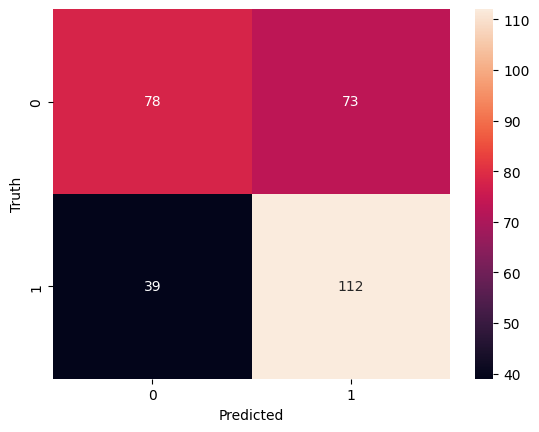

In [92]:
model_resample.evaluate(X_test, y_test)
y_predicted_re = model_resample.predict(X_test)
y_predicted_re = y_predicted_re.flatten()
y_predicted_re = np.where(y_predicted_re > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predicted_re)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
print(classification_report(y_test, y_predicted_re))
class_distribution = pd.value_counts(y)
print(class_distribution)